# Importando Libs utilizadas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sklearn
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Lendo a base de dados

In [2]:
df_diabetes = pd.read_csv('diabetes.csv')
df_diabetes.head(5)

,Numero Gravida,Glicose,Pressao,Triceps,Insulina,Massa Corporal,Pedigree diabetes,Idade,Classe
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Deletando a coluna "Classe"

In [3]:
df_diabetes_noclass = df_diabetes.drop('Classe', axis=1)

In [4]:
df_diabetes_noclass.head(5)

,Numero Gravida,Glicose,Pressao,Triceps,Insulina,Massa Corporal,Pedigree diabetes,Idade
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


# Normalizando valores

In [5]:
nomes = df_diabetes_noclass.columns
valores = df_diabetes_noclass.values
escala_min_max = preprocessing.MinMaxScaler()
valores_normalizados = escala_min_max.fit_transform(valores)
df_diabetes_normalizado = pd.DataFrame(valores_normalizados)
df_diabetes_normalizado.columns = nomes
df_diabetes_normalizado.head(5)

,Numero Gravida,Glicose,Pressao,Triceps,Insulina,Massa Corporal,Pedigree diabetes,Idade
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


# Padronizando as variáveis

In [6]:
scaler = StandardScaler()
scaler.fit(df_diabetes_normalizado)
df_diabetes_adjsscale = scaler.transform(df_diabetes_normalizado)

# Fazendo a divisão entre treino e teste

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(df_diabetes_adjsscale, df_diabetes['Classe'], test_size=0.4)

# Implementando o KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier

#### Criando uma instancia do modelo com u n_neighbors=1

In [10]:
knn = KNeighborsClassifier(n_neighbors=1)

#### Ajustando knn ao modelo de treinamento

In [11]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

# Fazendo Previsões e Avaliações Para Avaliar o Modelo KNN

#### Utilizando o método de previsão para prever valores usando seu modelo x_test

In [12]:
pred = knn.predict(x_test)

#### Criando uma matriz de confusão e um relatório de classificação

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
print(confusion_matrix(y_test, pred))

[[154  45]
 [ 54  55]]


In [15]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.74      0.77      0.76       199
          1       0.55      0.50      0.53       109

avg / total       0.67      0.68      0.68       308



# Escolhendo o valor k (Elbow)

#### Criando um loop que treina varios modelos KNN com valores k diferentes obtendo também um registro com a taxa de erros.

In [16]:
taxa_erro = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    taxa_erro.append(np.mean(pred!=y_test))
    

### Visualizando os treinamentos

Text(0.5,1,'Taxa de Erro x Valot de k')

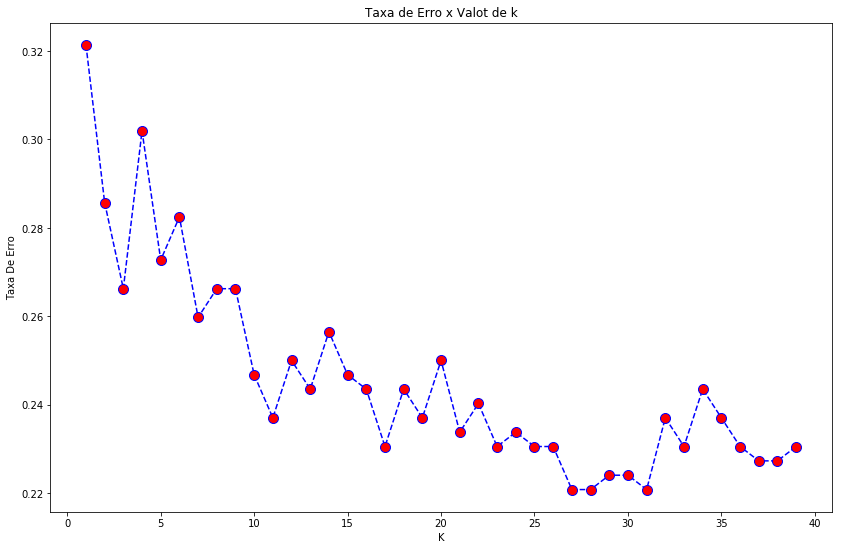

In [17]:
plt.figure(figsize=(14, 9))
plt.plot(range(1,40), taxa_erro, color='blue', linestyle='dashed', marker='o', markersize=10, markerfacecolor='red')
plt.ylabel('Taxa De Erro')
plt.xlabel('K')
plt.title('Taxa de Erro x Valot de k')


# Treinando modelo com o novo valor de k

In [50]:
knn = KNeighborsClassifier(n_neighbors=28)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
taxa_erro.append(np.mean(pred!=y_test))

print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[191   8]
 [ 60  49]]


             precision    recall  f1-score   support

          0       0.76      0.96      0.85       199
          1       0.86      0.45      0.59       109

avg / total       0.80      0.78      0.76       308

